In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import wrds
# import data_read
import pull_WRDS_call_reports, pull_treasuries_data
import pull_mbb_data
import data_preprocessing, compute_treasury_changes
# import calc_functions
# import Calc_table_statistic

warnings.filterwarnings("ignore")

### Treasuries Data

In [2]:
import investpy
import pandas as pd

indices = investpy.get_indices(country='united states')
indices[indices['name'].str.contains('S&P', case=False)]

,country,name,full_name,symbol,currency,class,market
387,united states,S&P 500 Consumer Discretionary,S&P 500 Consumer Discretionary,SPLRCD,USD,primary_sectors,world_indices
388,united states,S&P 500 Consumer Staples,S&P 500 Consumer Staples,SPLRCS,USD,primary_sectors,world_indices
396,united states,S&P 500,S&P 500,SPX,USD,major_indices,world_indices
408,united states,S&P 500 Energy,S&P 500 Energy,SPNY,USD,primary_sectors,world_indices
409,united states,S&P 500 Financials,S&P 500 Financials,SPSY,USD,primary_sectors,world_indices
...,...,...,...,...,...,...,...
1006,united states,CBOE S&P 500 BuyWrite,CBOE S&P 500 BuyWrite,BXM,USD,other_indices,global_indices
1093,united states,S&P High Yield Div Aristocrats TR,S&P High Yield Div Aristocrats TR,TRSPHYDA,USD,other_indices,global_indices
1094,united states,S&P 600 TR,S&P 600 TR,TR6GSPC,USD,other_indices,global_indices
1095,united states,S&P 500 TR,S&P 500 TR,SPXTR,USD,other_indices,global_indices


In [3]:
indices[indices['symbol'].str.contains('SPBDUSBT', case=False)]

,country,name,full_name,symbol,currency,class,market


In [4]:
import importlib
importlib.reload(pull_treasuries_data)
treasuries_data = pull_treasuries_data.pull_SP_Treasury_Bond_Index_investpy()

⚠️ Investpy data pull failed: ERR#0045: index s&p u.s. treasury bond index not found, check if it is correct.


In [5]:
treasuries_data = pull_treasuries_data.load_from_manual_excel()

✅ Successfully loaded Treasury Bond Index data from /Users/aadi/projects/svb-failure-case-study/data/manual/s_&_p_treasury_bond_index.xls


In [6]:
treasuries_data.head()

,Effective date,S&P U.S. Treasury Bond Index
0,2015-01-30,414.51
1,2015-02-02,414.20
2,2015-02-03,412.52
3,2015-02-04,412.79
4,2015-02-05,412.07


In [7]:
treasuries_data = data_preprocessing.preprocess_treasuries_data(treasuries_data)
treasuries_data.head()

,date,index
0,2015-01-30,414.51
1,2015-02-02,414.20
2,2015-02-03,412.52
3,2015-02-04,412.79
4,2015-02-05,412.07


##### Tried to pull S&P Bond Index from WRDS, Yahoo and Investpy but this did not work. Hence, we use data that was pulled manually

### MBS ETF Data

In [8]:
etf_mbs = pull_mbb_data.pull_MBB_data()
if etf_mbs is not None:
    etf_mbs = data_preprocessing.rename_etf_mbs_columns(etf_mbs)
    etf_mbs.head()

Failed to get ticker 'MBB' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['MBB']: Exception('%ticker%: No timezone found, symbol may be delisted')


⚠️ No data found for MBB from Yahoo Finance.


In [9]:
etf_mbs = pull_mbb_data.load_from_manual_csv()

✅ Successfully loaded MBB data from /Users/aadi/projects/svb-failure-case-study/data/manual/ishares_mbs_etf_daily.csv


In [10]:
etf_mbs.dtypes

Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [11]:
etf_mbs.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/25/2025,93.54,2839593,93.43,93.6276,93.060
1,02/24/2025,92.99,2637865,92.64,93.0600,92.550
2,02/21/2025,92.87,1584830,92.52,92.9750,92.415
3,02/20/2025,92.38,1627928,92.26,92.4299,92.250
4,02/19/2025,92.13,2126798,91.91,92.1872,91.870


##### We pull the MBS ETF Data from yfinance. Also, as an alternative, we have manual data

### Call Reports Data

In [12]:
rcfd_data_1 = pull_WRDS_call_reports.load_RCFD_series_1()
rcfd_data_2 = pull_WRDS_call_reports.load_RCFD_series_2()
rcon_data_1 = pull_WRDS_call_reports.load_RCON_series_1()
rcon_data_2 = pull_WRDS_call_reports.load_RCON_series_2()

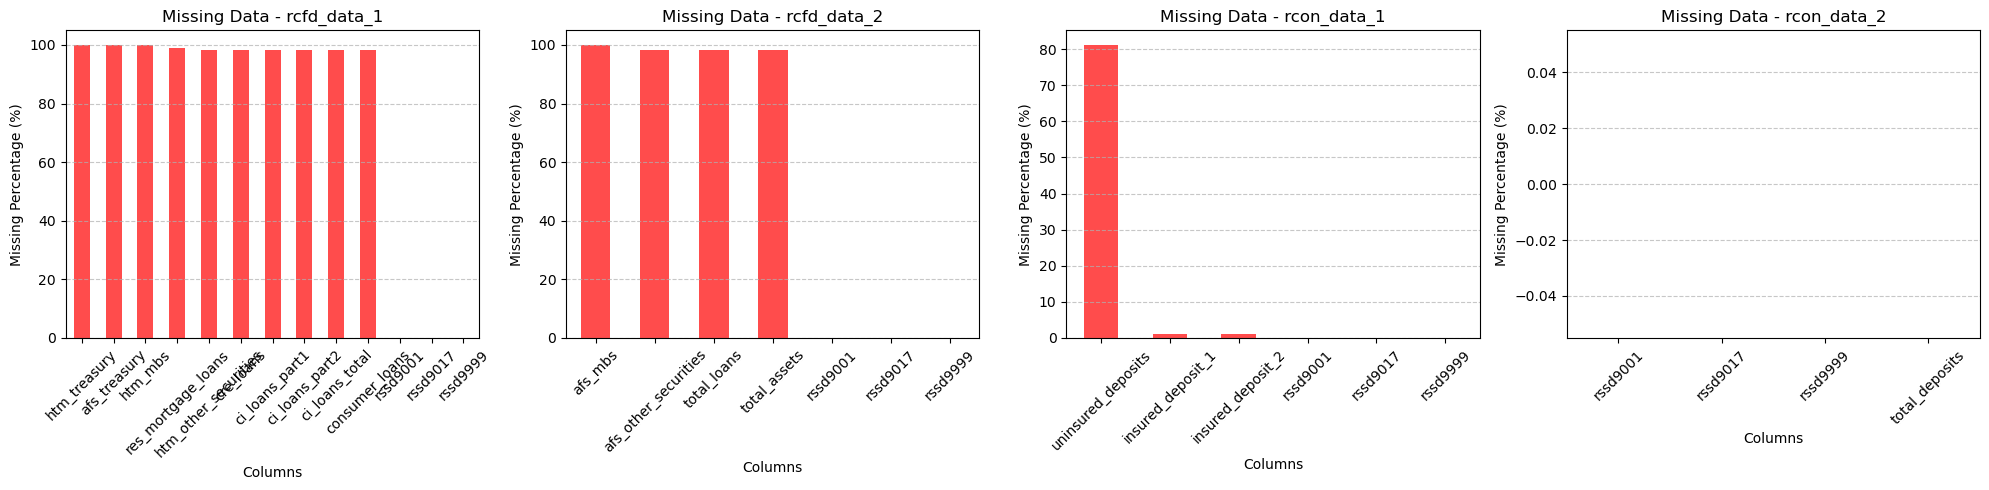

In [13]:
importlib.reload(data_preprocessing)
datasets = [rcfd_data_1, rcfd_data_2, rcon_data_1, rcon_data_2]
data_preprocessing.missing_data_analysis(datasets, dataset_names=[
    'rcfd_data_1', 'rcfd_data_2', 'rcon_data_1', 'rcon_data_2'
], show_plot=True)

In [14]:
df = pull_WRDS_call_reports.load_wrds_call_research()

In [15]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Define the date range
start_date = "2022-01-01"
end_date = "2023-03-31"

# Filter the DataFrame based on the date range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Display the filtered data
filtered_df.head()

,rssd9001,rcon9804,date,rssd9050,rssd9055,rssd9048,assets,cash,securities,securities_asu,...,q_intexptradingandborrowed,q_intincpersloans,q_persloansintinc,q_intincreloans,q_intexpdomdep,avgirate_timedep,avgirate_timedep_ytd,avgirate_savdep,avgirate_fordep,fedfundsrate
271,37,59.0,2022-03-31,10057,0,200.0,87842.0,12640.0,53347.0,53347.0,...,NaN,131.0,131.0,157.0,55.0,0.0079,0.0079,0.0017,None,0.0018
273,37,59.0,2022-06-30,10057,0,200.0,84231.0,8061.0,51665.0,51665.0,...,NaN,135.0,135.0,153.0,53.0,0.0076,0.0080,0.0017,None,0.0113
274,37,59.0,2022-09-30,10057,0,200.0,80081.0,4751.0,49439.0,49439.0,...,NaN,141.0,141.0,153.0,53.0,0.0079,0.0081,0.0016,None,0.0252
275,37,59.0,2022-12-31,10057,0,200.0,81497.0,9260.0,50548.0,50548.0,...,NaN,155.0,155.0,154.0,52.0,0.0080,0.0083,0.0017,None,0.0408
277,37,59.0,2023-03-31,10057,0,200.0,80558.0,5977.0,50973.0,50973.0,...,NaN,146.0,146.0,147.0,75.0,0.0117,0.0118,0.0024,None,0.0463


In [16]:
filtered_df.shape

(24565, 371)

In [17]:
filtered_df = filtered_df[['rssd9001', 'date', 'assets', 'securitiesheldtomaturity',
                      'securitiesavailableforsale', 'mbsassets', 'absassets', 'loans', 'totaldep', 'alldepuninsured', 'treasurysec', 'timedepuninsured', 'domdepuninsured',
                      'securitiesrmbs_less_3m', 'securitiesrmbs_3m_1y', 'securitiesrmbs_1y_3y', 'securitiesrmbs_3y_5y', 'securitiesrmbs_5y_15y', 'securitiesrmbs_over_15y',
                      'resloans_less_3m', 'resloans_3m_1y', 'resloans_1y_3y', 'resloans_3y_5y', 'resloans_5y_15y', 'resloans_over_15y', 'securitiestreasury_less_3m', 'securitiestreasury_3m_1y', 'securitiestreasury_1y_3y','securitiestreasury_3y_5y', 'securitiestreasury_5y_15y', 'securitiestreasury_over_15y', 'loansleases_less_3m','loansleases_3m_1y', 'loansleases_1y_3y', 'loansleases_3y_5y', 'loansleases_5y_15y', 'loansleases_over_15y']
]

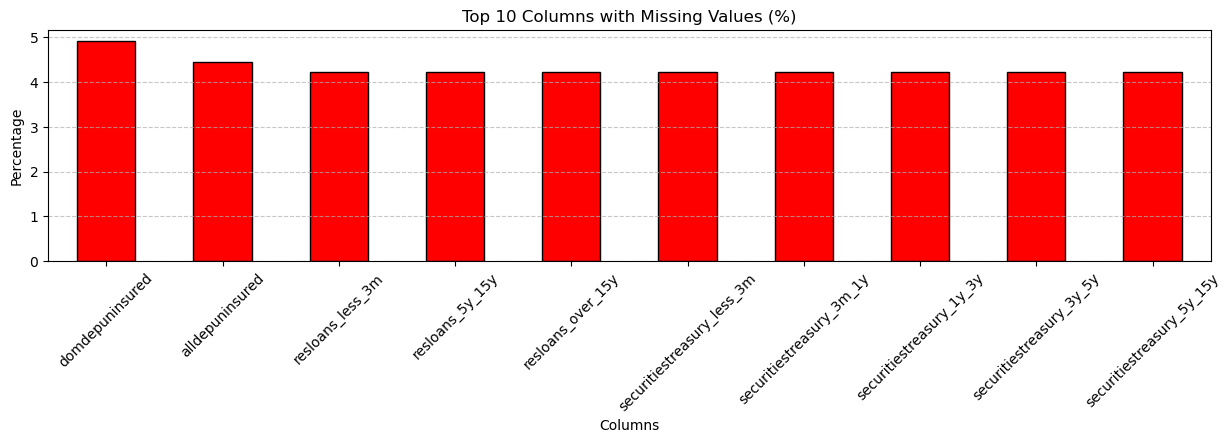

In [18]:
importlib.reload(data_preprocessing)
data_preprocessing.missing_values_percentage(filtered_df)